# Sazonalidade

O coração do $prophet$.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

/home/rodolpho/Projects/prophet/PROPHET/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('./data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


16:15:35 - cmdstanpy - INFO - Chain [1] start processing
16:15:35 - cmdstanpy - INFO - Chain [1] done processing


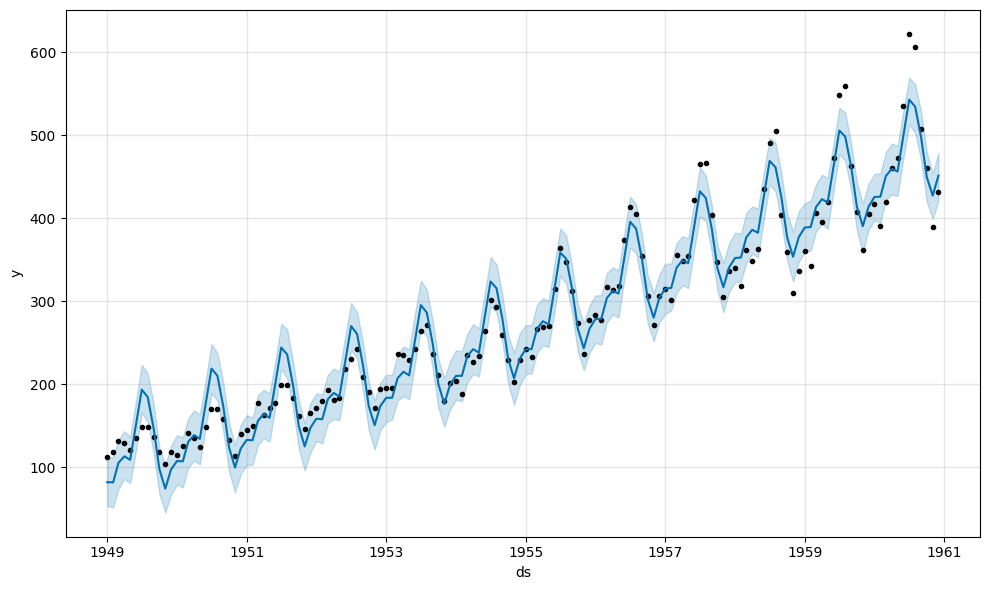

In [3]:
model_a = Prophet(seasonality_mode='additive', yearly_seasonality=4)
model_a.fit(df)
forecast_a = model_a.predict()
fig_a = model_a.plot(forecast_a)
plt.show()

16:15:36 - cmdstanpy - INFO - Chain [1] start processing
16:15:36 - cmdstanpy - INFO - Chain [1] done processing


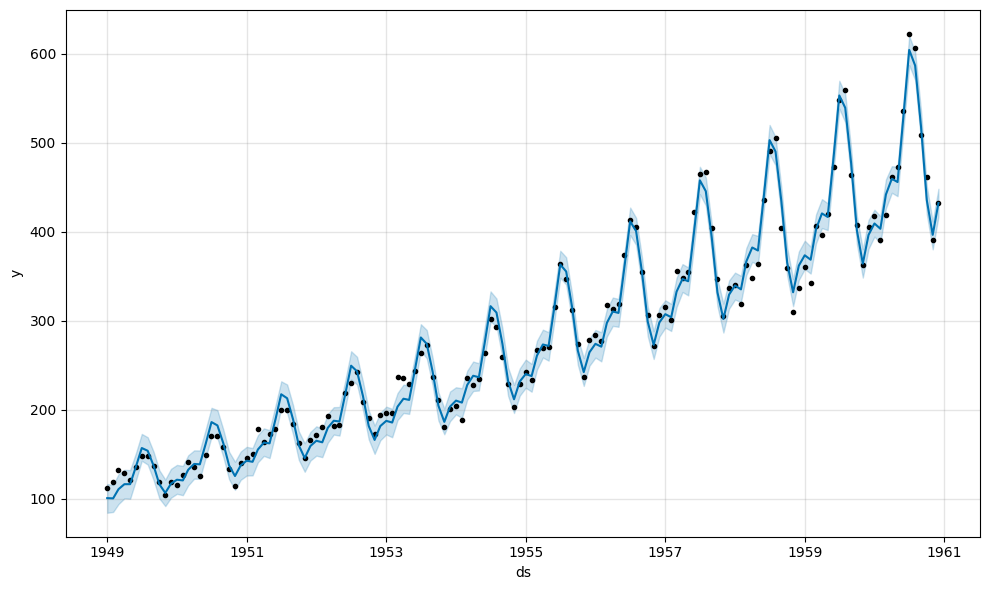

In [4]:
model_m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model_m.fit(df)
forecast_m = model_m.predict()
fig_m = model_m.plot(forecast_m)
plt.show()

In [5]:
forecast_m.head(3).T

,0,1,2
ds,1949-01-01 00:00:00,1949-02-01 00:00:00,1949-03-01 00:00:00
trend,111.737324,113.687588,115.449118
yhat_lower,83.973753,84.91703,93.747473
yhat_upper,116.243789,115.290106,127.300463
trend_lower,111.737324,113.687588,115.449118
trend_upper,111.737324,113.687588,115.449118
multiplicative_terms,-0.101204,-0.11911,-0.043247
multiplicative_terms_lower,-0.101204,-0.11911,-0.043247
multiplicative_terms_upper,-0.101204,-0.11911,-0.043247
yearly,-0.101204,-0.11911,-0.043247


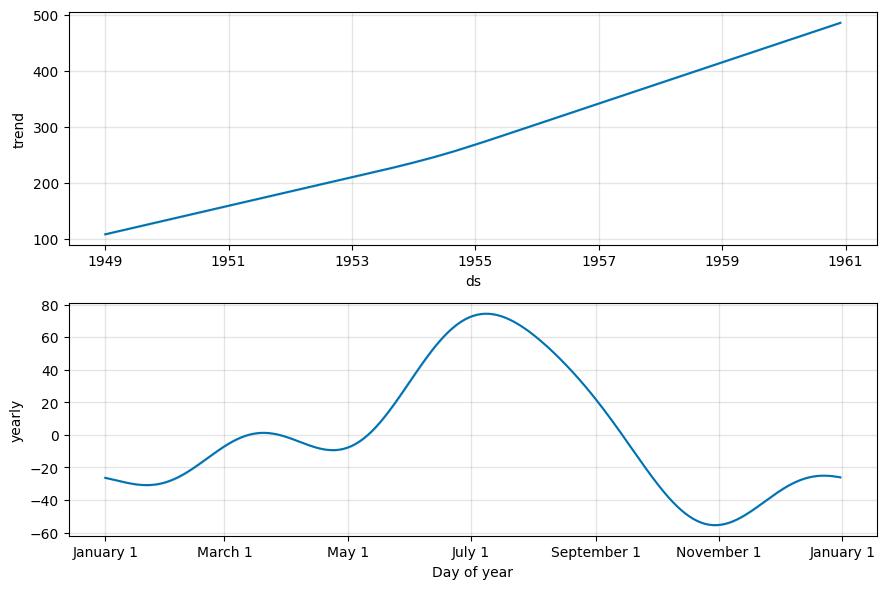

In [6]:
fig2_a2 = model_a.plot_components(forecast_a)
plt.show()

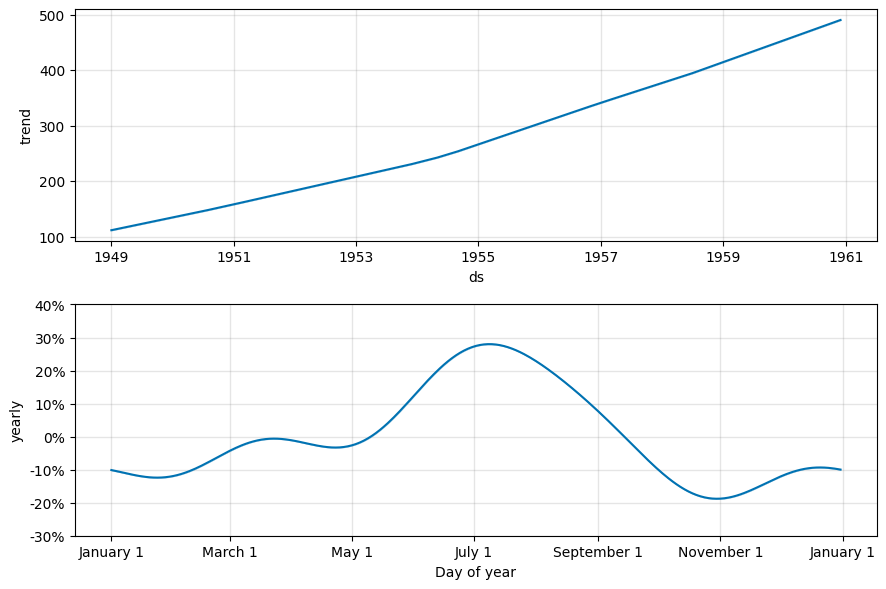

In [7]:
fig2_m = model_m.plot_components(forecast_m)
plt.show()

### Pag 68 - Dicas

Quando os dados representam uma contagem de dados no tempo, como a quantidade de passageiros, nós iremos geralmente usar a `sazonalidade multiplicativa`. Usar a sazonalidade aditiva, poderá causar valores preditos negativos.

In [8]:
df = pd.read_csv('./data/divvy_daily.csv')
df.head()

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow


Vamos usar o dados de temperatura e tempo no capítulo 8

In [9]:
df = pd.read_csv('./data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2014-01-01,95
1,2014-01-02,111
2,2014-01-03,6
3,2014-01-04,181
4,2014-01-05,32


16:15:37 - cmdstanpy - INFO - Chain [1] start processing
16:15:37 - cmdstanpy - INFO - Chain [1] done processing


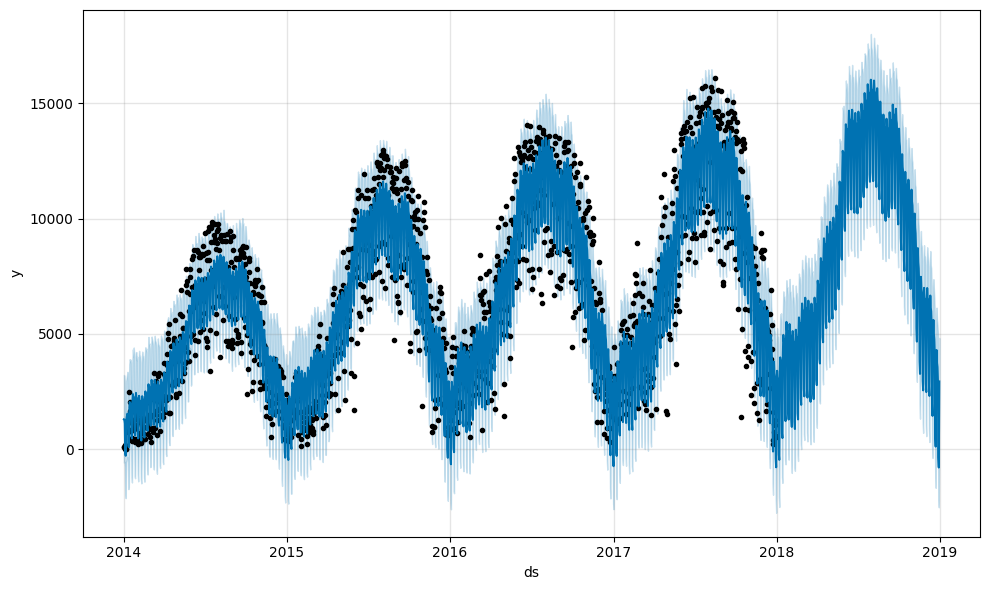

In [10]:
model = Prophet(seasonality_mode = 'multiplicative', yearly_seasonality='auto')
model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

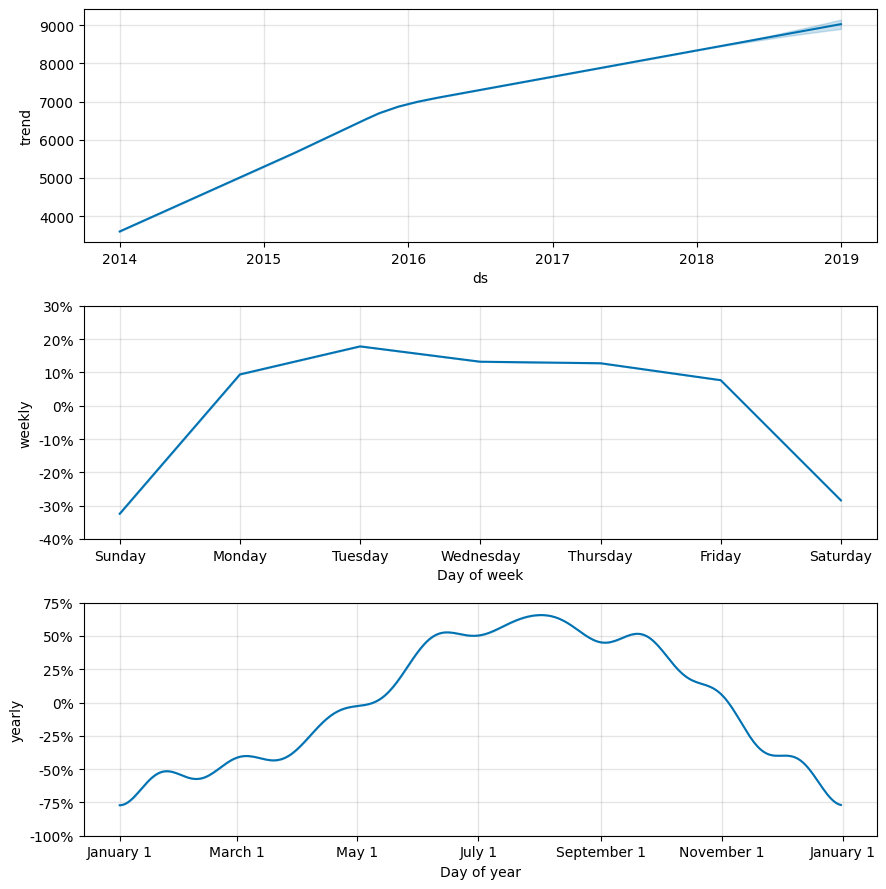

In [11]:
fig2 = model.plot_components(forecast)
plt.show()

### Controlando a sazonalidade com as ordens da série de Fourier

O parâmetro de sazonalidade altera a `flexibilidade` das curvas do anual, semanal e diário.

Compare as sazonalidade anuais entre os dois modelos (*anterior e posterior*)

16:26:13 - cmdstanpy - INFO - Chain [1] start processing
16:26:13 - cmdstanpy - INFO - Chain [1] done processing


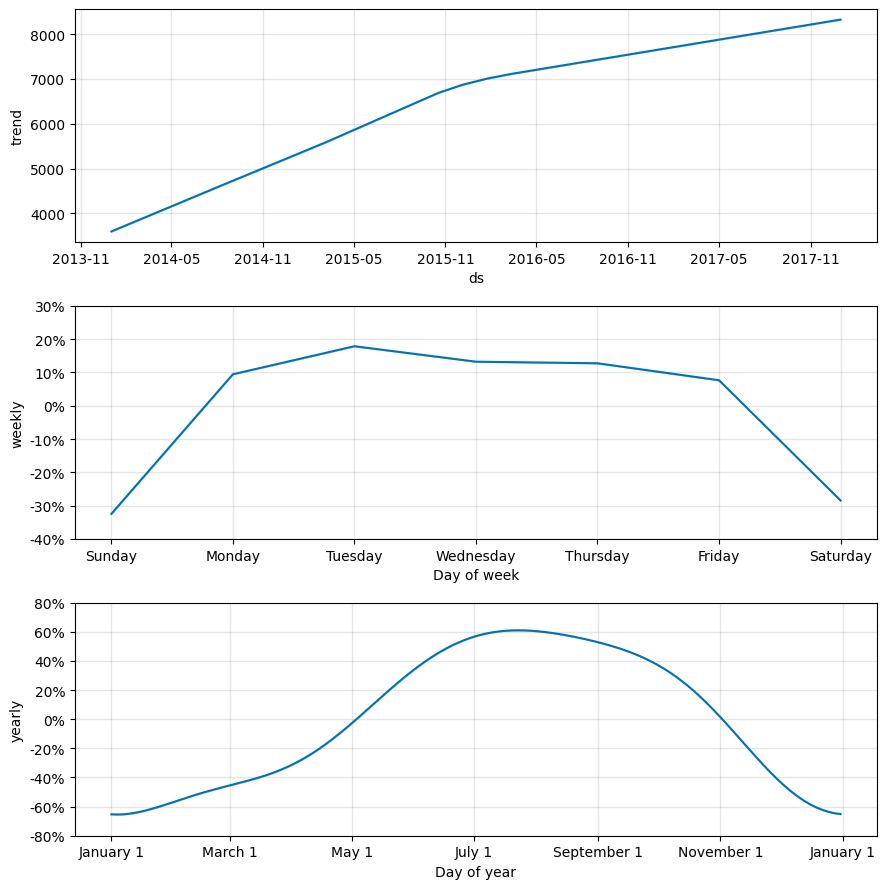

In [24]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model.fit(df)
forecast = model.predict()
fig3 = model.plot_components(forecast)
plt.show()

### Adicionando sazonalidade customizada



pg 78